# <center>Statistical Data Modeling</center>
Source:  https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/4.%20Statistical%20Data%20Modeling.ipynb

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

### Estimation

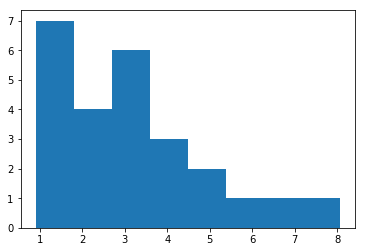

In [3]:
x = np.array([ 1.00201077,  1.58251956,  0.94515919,  6.48778002,  1.47764604,
        5.18847071,  4.21988095,  2.85971522,  3.40044437,  3.74907745,
        1.18065796,  3.74748775,  3.27328568,  3.19374927,  8.0726155 ,
        0.90326139,  2.34460034,  2.14199217,  3.27446744,  3.58872357,
        1.20611533,  2.16594393,  5.56610242,  4.66479977,  2.3573932 ])
_ = plt.hist(x, bins=8)

### Example: Nashville Precipitation

In [4]:
precip = pd.read_table('data/nashville_precip.txt', index_col=0, na_values='NA',
                      delim_whitespace=True)
precip.head()

       Jan   Feb   Mar    Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                         
1871  2.76  4.58  5.01   4.13  3.30  2.98  1.58  2.36  0.95  1.31  2.13  1.65
1872  2.32  2.11  3.14   5.91  3.09  5.17  6.10  1.65  4.50  1.58  2.25  2.38
1873  2.96  7.14  4.11   3.59  6.31  4.20  4.63  2.36  1.81  4.28  4.36  5.94
1874  5.22  9.23  5.36  11.84  1.49  2.87  2.65  3.52  3.12  2.63  6.12  4.19
1875  6.15  3.06  8.14   4.22  1.73  5.63  8.12  1.60  3.79  1.25  5.46  4.30

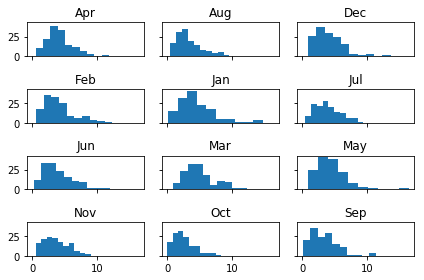

In [7]:
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [8]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)

        Jan    Feb   Mar    Apr    May   Jun   Jul   Aug    Sep   Oct   Nov  \
Year                                                                          
1871   2.76   4.58  5.01   4.13   3.30  2.98  1.58  2.36   0.95  1.31  2.13   
1872   2.32   2.11  3.14   5.91   3.09  5.17  6.10  1.65   4.50  1.58  2.25   
1873   2.96   7.14  4.11   3.59   6.31  4.20  4.63  2.36   1.81  4.28  4.36   
1874   5.22   9.23  5.36  11.84   1.49  2.87  2.65  3.52   3.12  2.63  6.12   
1875   6.15   3.06  8.14   4.22   1.73  5.63  8.12  1.60   3.79  1.25  5.46   
1876   6.41   2.22  5.28   3.62   3.40  5.65  7.15  5.77   2.52  2.68  1.26   
1877   4.05   1.06  4.98   9.47   1.25  6.02  3.25  4.16   5.40  2.61  4.93   
1878   3.34   2.10  3.48   6.88   2.33  3.28  9.43  5.02   1.28  2.17  3.20   
1879   6.32   3.13  3.81   2.88   2.88  2.50  8.47  4.62   5.18  2.90  5.85   
1880   3.74  12.37  8.16   5.26   4.13  3.97  5.69  2.22   5.39  7.24  5.77   
1881   3.54   5.48  2.79   5.12   3.67  3.70  0.86  

In [9]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [11]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

In [12]:
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean

In [13]:
alpha_mom; beta_mom

Jan    1.531684
Feb    1.346249
Mar    1.077920
Apr    0.979219
May    1.226724
Jun    1.299403
Jul    0.969593
Aug    1.122522
Sep    1.462581
Oct    1.050243
Nov    0.998206
Dec    1.297344
dtype: float64

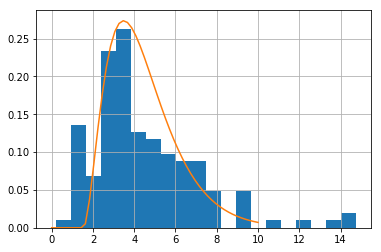

In [16]:
from scipy.stats.distributions import gamma

precip.Jan.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

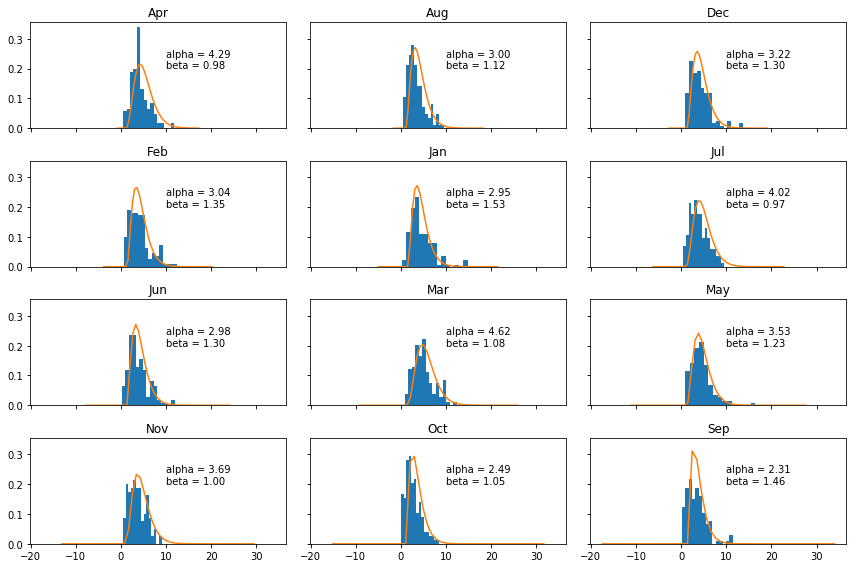

In [20]:
axs = precip.hist(normed=True, figsize=(12,8), sharex=True, sharey=True,
                 bins=15, grid=False)

for ax in axs.ravel():
    # Get Month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimate
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

### Maximum Likelihood

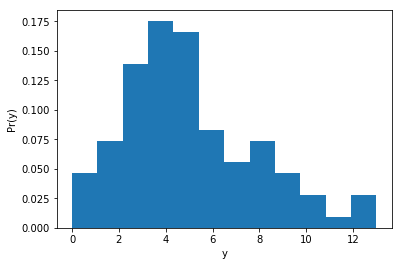

In [22]:
y = np.random.poisson(5, size=100)
plt.hist(y, bins=12, normed=True)
plt.xlabel('y'); plt.ylabel('Pr(y)')

In [25]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

lam = 6
value = 10
poisson_like(value, lam)


0.041303093412337726

In [26]:
np.sum(poisson_like(yi, lam) for yi in y)

10.789482957384582

In [27]:
lam = 8
np.sum(poisson_like(yi, lam) for yi in y)

7.4118265898134137

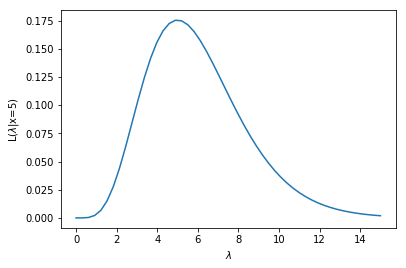

In [33]:
lambdas = np.linspace(0, 15)
x = 5
plt.plot(lambdas, [poisson_like(x, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(x))

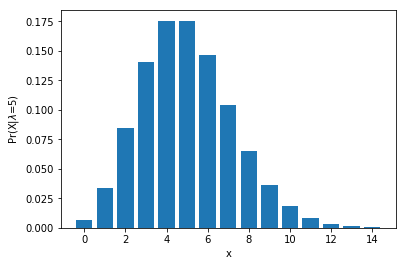

In [34]:
lam = 5
xvals = np.arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)')

### Finding the MLE

In [38]:
from scipy.optimize import newton

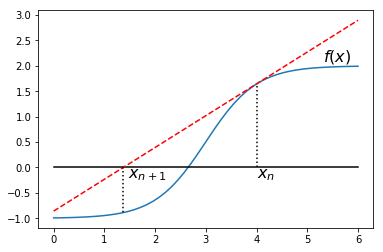

In [39]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)
# zero line
plt.plot([0,6], [0,0], 'k-')
# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)
# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')
# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)


In [40]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [41]:
# Calculate statistics
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

In [43]:
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

3.5189679152399647

In [44]:
beta_mle = alpha_mle/precip.mean()
beta_mle

Jan    0.777898
Feb    0.858745
Mar    0.706962
Apr    0.836959
May    0.813507
Jun    0.908478
Jul    0.903351
Aug    1.045040
Sep    1.041836
Oct    1.348005
Nov    0.954714
Dec    0.842616
dtype: float64

ValueError: operands could not be broadcast together with shapes (50,) (12,) 

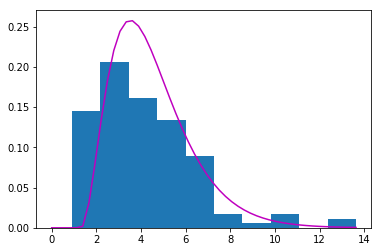

In [49]:
dec = precip.Dec
dec.hist(normed=True, bins=10, grid=False)
x = np.linspace(0, dec.max())
plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'm-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

In [50]:
from scipy.stats import gamma
gamma.fit(precip.Dec)

(2.2427517753152308, 0.65494604470188622, 1.570073932063466)

### Example: Truncated Distribution

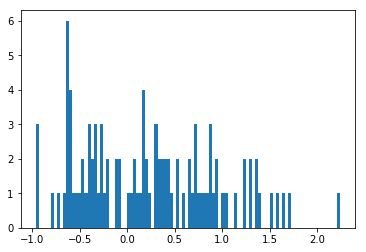

In [51]:
x = np.random.normal(size=100)
a = -1
x_small = x < a
while x_small.sum():
    x[x_small] = np.random.normal(size=x_small.sum())
    x_small = x < a

_ = plt.hist(x, bins=100)

In [52]:
from scipy.stats.distributions import norm

trunc_norm = lambda theta, a, x: -(np.log(norm.pdf(x, theta[0], theta[1])) - 
                                      np.log(1 - norm.cdf(a, theta[0], theta[1]))).sum()

In [53]:
from scipy.optimize import fmin

fmin(trunc_norm, np.array([1,2]), args=(-1,x))

Optimization terminated successfully.
         Current function value: 101.075051
         Iterations: 47
         Function evaluations: 88


array([ 0.04647843,  0.84876019])

### Kernel Density Estimates

In [54]:
# Some random data
y = np.random.random(15) * 10
y

array([ 1.753259  ,  2.8110389 ,  4.34378899,  3.42371316,  2.3754904 ,
        8.581252  ,  9.15428028,  4.52276915,  0.1705568 ,  2.79966545,
        7.32019008,  7.52960418,  2.22130434,  7.51534864,  3.66459856])

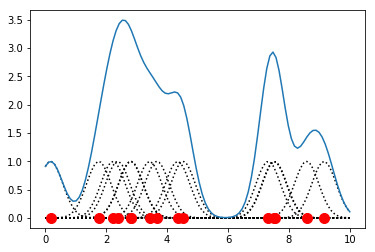

In [56]:
x = np.linspace(0,10,100)
# Smoothing parameter
s = 0.4
# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1))
plt.plot(y, np.zeros(len(y)),'ro',ms=10)

In [57]:
# Create a bi-modal distributions with a mixture of Normals
x1 = np.random.normal(0,3,50)
x2 = np.random.normal(4,1,50)

# Append by row
x = np.r_[x1, x2]

(array([ 0.01957773,  0.04568138,  0.06525911,  0.0587332 ,  0.08483684,
         0.09788866,  0.20882915,  0.07178502]),
 array([-5.56337262, -4.03101951, -2.4986664 , -0.96631329,  0.56603982,
         2.09839293,  3.63074604,  5.16309915,  6.69545226]),
 <a list of 8 Patch objects>)

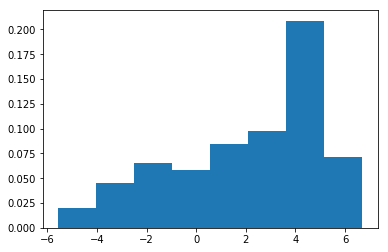

In [58]:
plt.hist(x, bins=8, normed=True)

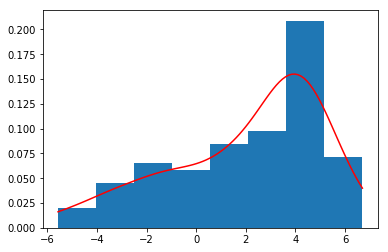

In [60]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=8, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

### Exercise: Cervical Dystonia Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a900048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1188d3048>]], dtype=object)

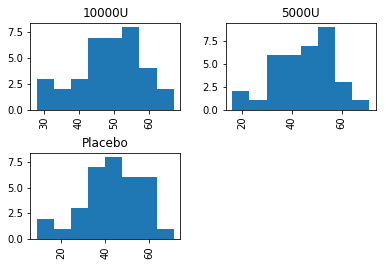

In [65]:
cdystonia = pd.read_csv('data/cdystonia.csv')
cdystonia[cdystonia.obs==6].hist(column='twstrs', by=cdystonia.treat, bins=8)
          

### Regression models

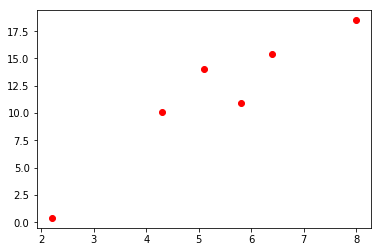

In [67]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
plt.plot(x,y,'ro')

In [70]:
ss = lambda theta, x, y: np.sum((y-theta[0] - theta[1]*x) **2)

In [71]:
ss([0,1], x, y)

333.35000000000002

In [72]:
b0, b1 = fmin(ss, [0,1], args=(x,y))
b0, b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.3500136038870876, 3.0000002915386412)

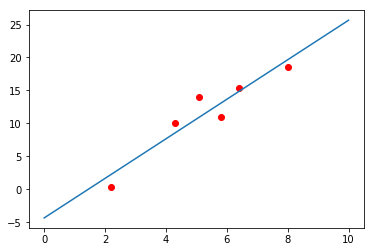

In [73]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0 + b1*10])

(0, 20)

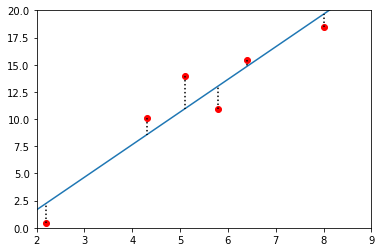

In [74]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0 + b1*10])
for xi , yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], 'k:')
plt.xlim(2,9); plt.ylim(0,20)

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77
0.00157170444494 2.31231743181


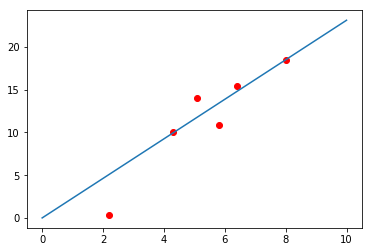

In [76]:
sabs = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))
b0, b1 = fmin(sabs, [0,1], args=(x,y))
print(b0, b1)
plt.plot(x,y,'ro' )
plt.plot([0,10], [b0, b0+b1*10])

Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372
-11.0748186039 6.0576975948 -0.302681057088


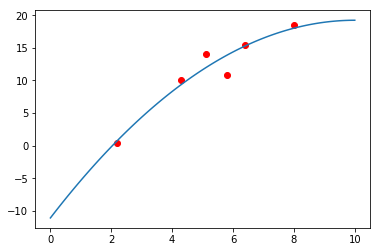

In [79]:
ss2 = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2)) ** 2)
b0,b1,b2 = fmin(ss2, [1,1,-1], args=(x,y))
print (b0,b1,b2)
plt.plot(x, y, 'ro')
xvals = np.linspace(0, 10, 100)
plt.plot(xvals, b0 + b1*xvals + b2*(xvals**2))

Optimization terminated successfully.
         Current function value: 4274.128398
         Iterations: 230
         Function evaluations: 407


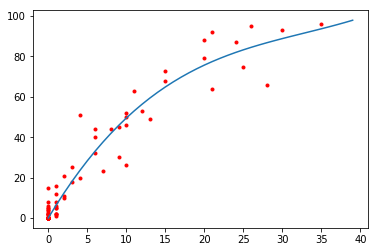

In [81]:
ss3 = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2) 
                                  - theta[3]*(x**3)) ** 2)

bb = pd.read_csv("data/baseball.csv", index_col=0)
plt.plot(bb.hr, bb.rbi, 'r.')
b0,b1,b2,b3 = fmin(ss3, [0,1,-1,0], args=(bb.hr, bb.rbi))
xvals = np.arange(40)
plt.plot(xvals, b0 + b1*xvals + b2*(xvals**2) + b3*(xvals**3))

In [82]:
import statsmodels.api as sm

straight_line = sm.OLS(y, sm.add_constant(x)).fit()
straight_line.summary()

/Users/Kavi/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/Kavi/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     32.67
Date:                Sat, 21 Oct 2017   Prob (F-statistic):            0.00463
Time:                        21:56:04   Log-Likelihood:                -12.325
No. Observations:                   6   AIC:                             28.65
Df Residuals:                       4   BIC:                             28.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3500      2.937     -1.481      0.213     -12.505       3.805
x1             3.0000      0.525      5.716      0.005       1.543       4.457
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.387
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.570
Skew:                           0.359   Prob(JB):                        0.752
Kurtosis:                       1.671   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
from statsmodels.formula.api import ols as OLS

data = pd.DataFrame(dict(x=x, y=y))
cubic_fit = OLS('y ~ x + I(x**2)', data).fit()

cubic_fit.summary()

/Users/Kavi/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     19.50
Date:                Sat, 21 Oct 2017   Prob (F-statistic):             0.0191
Time:                        21:56:19   Log-Likelihood:                -11.056
No. Observations:                   6   AIC:                             28.11
Df Residuals:                       3   BIC:                             27.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0748      6.013     -1.842      0.163     -30.211       8.062
x              6.0577      2.482      2.441      0.092      -1.840      13.955
I(x ** 2)     -0.3027      0.241     -1.257      0.298      -1.069       0.464
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.711
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.655
Skew:                          -0.809   Prob(JB):                        0.721
Kurtosis:                       2.961   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise Polynomial function

Optimization terminated successfully.
         Current function value: 7.015262
         Iterations: 663
         Function evaluations: 983


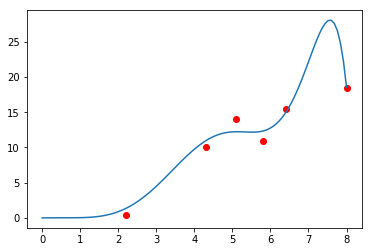

In [84]:
def calc_poly(params, data):
        x = np.c_[[data**i for i in range(len(params))]]
        return np.dot(params, x)
    
ssp = lambda theta, x, y: np.sum((y - calc_poly(theta, x)) ** 2)
betas = fmin(ssp, np.zeros(10), args=(x,y), maxiter=1e6)
plt.plot(x, y, 'ro')
xvals = np.linspace(0, max(x), 100)
plt.plot(xvals, calc_poly(betas, xvals))

In [86]:
n = len(x)

aic = lambda rss, p, n: n * np.log(rss/(n-p-1)) + 2*p

RSS1 = ss(fmin(ss, [0,1], args=(x,y)), x, y)
RSS2 = ss2(fmin(ss2, [1,1,-1], args=(x,y)), x, y)

print (aic(RSS1, 2, n), aic(RSS2, 3, n))

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372
15.7816583572 17.6759368019


### Logistic Regression

In [88]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.name

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
                              ...                        
1297                               Wiseman, Mr. Phillippe
1298                            Wittevrongel, Mr. Camille
1299                                  Yasbeck, Mr. Antoni
1300              Yasbeck, Mrs. Antoni (Selini Alexander)
1301          

/Users/Kavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


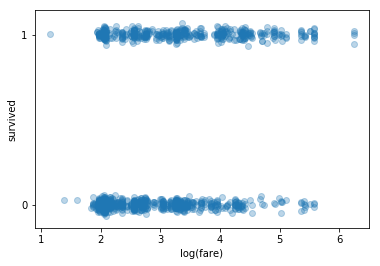

In [89]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
plt.scatter(np.log(titanic.fare), titanic.survived + jitter, alpha=0.3)
plt.yticks([0,1])
plt.ylabel("survived")
plt.xlabel("log(fare)")

In [90]:
x = np.log(titanic.fare[titanic.fare>0])
y = titanic.survived[titanic.fare>0]
betas_titanic = fmin(ss, [1,1], args=(x,y))

Optimization terminated successfully.
         Current function value: 277.621917
         Iterations: 55
         Function evaluations: 103


/Users/Kavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


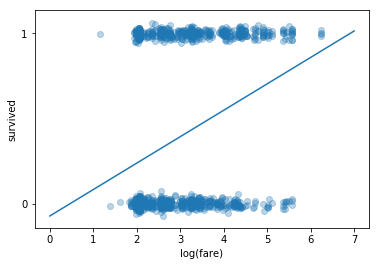

In [91]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
plt.scatter(np.log(titanic.fare), titanic.survived + jitter, alpha=0.3)
plt.yticks([0,1])
plt.ylabel("survived")
plt.xlabel("log(fare)")
plt.plot([0,7], [betas_titanic[0], betas_titanic[0] + betas_titanic[1]*7.])

### Stochastic model

/Users/Kavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


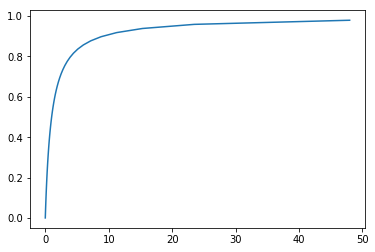

In [92]:
logit = lambda p: np.log(p/(1.-p))
unit_interval = np.linspace(0,1)
plt.plot(unit_interval/(1-unit_interval), unit_interval)

/Users/Kavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/Kavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


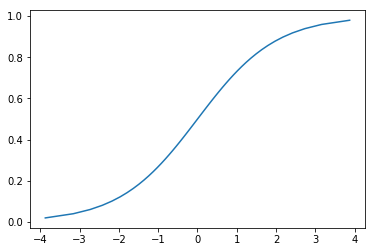

In [93]:
plt.plot(logit(unit_interval), unit_interval)

In [95]:
invlogit = lambda x: 1. / (1 + np.exp(-x))

def logistic_like(theta, x, y):
    p = invlogit(theta[0] + theta[1] * x)
    # Return negative of log-likelihood
    return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p))

In [96]:
x, y = titanic[titanic.fare.notnull()][['fare', 'survived']].values.T

In [98]:
b0,b1 = fmin(logistic_like, [0.5,0], args=(x,y))
b0, b1

Optimization terminated successfully.
         Current function value: 827.015955
         Iterations: 47
         Function evaluations: 93


(-0.88238984528338194, 0.012452067664164127)

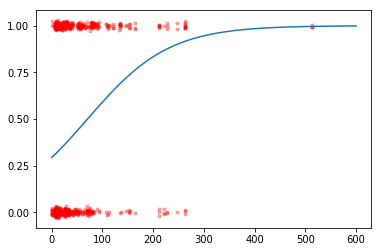

In [99]:
jitter = np.random.normal(scale=0.01, size=len(x))
plt.plot(x, y+jitter, 'r.', alpha=0.3)
plt.yticks([0,.25,.5,.75,1])
xvals = np.linspace(0, 600)
plt.plot(xvals, invlogit(b0+b1*xvals))

In [100]:
logistic = sm.GLM(y, sm.add_constant(x), family=sm.families.Binomial()).fit()
logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1308
Model:                            GLM   Df Residuals:                     1306
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -827.02
Date:                Sat, 21 Oct 2017   Deviance:                       1654.0
Time:                        22:00:43   Pearson chi2:                 1.33e+03
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8824      0.076    -11.684      0.000      -1.030      -0.734
x1             0.0125      0.002      7.762      0.000       0.009       0.016
==============================================================================
"""

### Exercise: multivariate logistic regression

In [101]:
np.random.permutation(titanic.name)[:5]

array(['Dantcheff, Mr. Ristiu', 'Sage, Mrs. John (Annie Bullen)',
       'Lang, Mr. Fang', 'Blackwell, Mr. Stephen Weart', 'Lam, Mr. Len'], dtype=object)

In [102]:
random_ind = np.random.randint(0, len(titanic), 5)
titanic.name[random_ind]

577        Walcroft, Miss. Nellie
1105     Panula, Mr. Jaako Arnold
618      Allen, Mr. William Henry
427     Hamalainen, Master. Viljo
1140       Reynolds, Mr. Harold J
Name: name, dtype: object

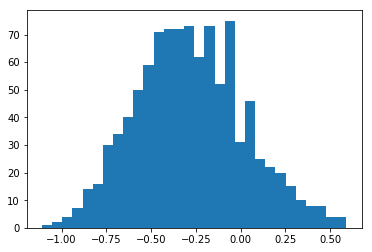

In [103]:
n = 10
R = 1000
# Original sample (n=10)
x = np.random.normal(size=n)
# 1000 bootstrap samples of size 10
s = [x[np.random.randint(0,n,n)].mean() for i in range(R)]
_ = plt.hist(s, bins=30)

### Boostrap Estimates

In [105]:
boot_mean = np.sum(s)/R
boot_mean

-0.28031808243239548

In [106]:
boot_var = ((np.array(s) - boot_mean) ** 2).sum() / (R-1)
boot_var

0.09163939495981821

In [107]:
boot_mean - np.mean(x)

-0.010357037596377905

### Boostrap Percentiles Intervals

In [108]:
s_sorted = np.sort(s)
s_sorted[:10]

array([-1.10883273, -1.01816533, -1.01107694, -0.97466075, -0.96402895,
       -0.96310524, -0.95546411, -0.936759  , -0.93349892, -0.93077221])

In [109]:
s_sorted[-10:]

array([ 0.46920563,  0.47433245,  0.49305768,  0.50932927,  0.51985079,
        0.52459371,  0.53725544,  0.58950715,  0.59122392,  0.59124078])

In [111]:
alpha = 0.05
s_sorted[[(R+1)*alpha/2, (R+1)*(1-alpha/2)]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices